In [4]:
#数据清洗

df=pd.read_csv(r'D:\b站学习\数据分析-BV1Ui4y1o7wh\书籍+随堂源码+说明\sample_code\data\HR.csv')
#Satisfaction Level
sl_s=df["satisfaction_level"]
sl_null=sl_s.isnull()#是否为空值
print(df[df["satisfaction_level"].isnull()])
le_s = df["last_evaluation"]
le_null=le_s[le_s.isnull()]
sl_s=sl_s.dropna()#丢弃空值
sl_s=sl_s.fillna(1)#将空值填充成1
q_low=le_s.quantile(q=0.25)#下四分位数
q_high=le_s.quantile(q=0.75)#上四分位数
k=1.5
q_interval=q_high-q_low
#异常值过滤
le_s=le_s[le_s<q_high+k*q_interval][le_s>q_low-k*q_interval]

<IPython.core.display.Javascript object>

       satisfaction_level  last_evaluation  number_project  \
14999                 NaN             0.52               2   
15000                 NaN        999999.00               2   

       average_monthly_hours  time_spend_company  Work_accident  left  \
14999                    158                   3              0     1   
15000                    158                   3              0     1   

       promotion_last_5years department salary  
14999                      0    support    low  
15000                      0       sale    low  


In [5]:
le_s

0        0.53
1        0.86
2        0.88
3        0.87
4        0.52
         ... 
14996    0.53
14997    0.96
14998    0.52
14999    0.52
15001    0.40
Name: last_evaluation, Length: 15001, dtype: float64

In [71]:
df.to_csv(r'D:\b站学习\数据分析-BV1Ui4y1o7wh\书籍+随堂源码+说明\sample_code\data\HR_clean.csv')

In [2]:
from matplotlib import pyplot as plt
plt.show(qqplot(ss.norm.rvs(size=100)))

NameError: name 'qqplot' is not defined

In [4]:
import numpy as np
import scipy.stats as ss
norm_dist = ss.norm.rvs(size=20) #生成一个数量为20的正态分布


In [5]:
norm_dist

array([-0.87609637, -0.69280741,  0.13970885, -0.45111277,  1.0099405 ,
        0.56687527,  0.06856553, -1.32131116, -0.47550723, -0.61168477,
        0.00939407,  0.93823937,  0.87084447, -1.73188923, -0.22906311,
        0.08322628, -0.50068667,  0.0019763 , -0.43042255,  1.45826081])

In [6]:
ss.normaltest(norm_dist) #检验该分布是否为正态分布

NormaltestResult(statistic=0.04031757141121949, pvalue=0.9800430441249482)

In [7]:
ss.chi2_contingency([[15,95],[85,5]]) #创建一个案例

(126.08080808080808,
 2.9521414005078985e-29,
 1,
 array([[55., 55.],
        [45., 45.]]))

In [8]:
ss.ttest_ind(ss.norm.rvs(size=10),ss.norm.rvs(size=20)) #两个数组的t检验，均值差别

Ttest_indResult(statistic=-0.39182566656972284, pvalue=0.6981534047127198)

In [10]:
ss.f_oneway([49,50,39,40,43],[28,32,30,26,34],[38,40,45,42,48]) #F检验

F_onewayResult(statistic=17.619417475728156, pvalue=0.0002687153079821641)

In [12]:
from statsmodels.graphics.api import qqplot
from matplotlib import pyplot as plt

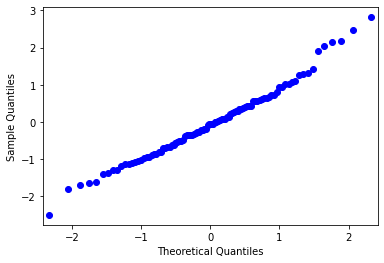

In [13]:
 plt.show(qqplot(ss.norm.rvs(size=100))) #qqplot是将该组数据的四分之三分位点数和正态分布的做对比

In [14]:
import pandas as pd 

In [15]:
s1 = pd.Series([0.1,0.2,1.1,2.4,1.3,0.3,0.5])
s2 = pd.Series([0.5,0.4,1.2,2.5,1.1,0.7,0.1])
s1.corr(s2) #计算两者相关系数

0.9333729600465923

In [16]:
s1.corr(s2, method='spearman') #指定计算方法

0.7142857142857144

In [17]:
df = pd.DataFrame(np.array([s1,s2]).T)

In [19]:
df

,0,1
0,0.1,0.5
1,0.2,0.4
2,1.1,1.2
3,2.4,2.5
4,1.3,1.1
5,0.3,0.7
6,0.5,0.1


In [18]:
df.corr()

,0,1
0,1.000000,0.933373
1,0.933373,1.000000


In [22]:
x = np.arange(10).astype(np.float).reshape((10,1))
y = x*3+4+np.random.random((10,1))

In [23]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
res = reg.fit(x,y)
y_pred = reg.predict(x)

In [25]:
print(reg.coef_,
reg.intercept_)

[[3.01063537]] [4.46719951]


In [29]:
#PCA变换

data = np.array([np.array([2.5,0.5,2.2,1.9,3.1,2.3,2,1,1.5,1.1]),
                np.array([2.4,0.7,2.9,2.2,3,2.7,1.6,1.1,1.6,0.9])]).T

In [30]:
data

array([[2.5, 2.4],
       [0.5, 0.7],
       [2.2, 2.9],
       [1.9, 2.2],
       [3.1, 3. ],
       [2.3, 2.7],
       [2. , 1.6],
       [1. , 1.1],
       [1.5, 1.6],
       [1.1, 0.9]])

In [31]:
from sklearn.decomposition import PCA
lower_dim = PCA(n_components=1)
lower_dim.fit(data)
lower_dim.explained_variance_ratio_

array([0.96318131])

In [33]:
lower_dim.fit_transform(data)

array([[-0.82797019],
       [ 1.77758033],
       [-0.99219749],
       [-0.27421042],
       [-1.67580142],
       [-0.9129491 ],
       [ 0.09910944],
       [ 1.14457216],
       [ 0.43804614],
       [ 1.22382056]])

In [38]:
#手写PCA方法
import numpy as np
from scipy import linalg
def myPCA(data,n_components=100000):
    mean_val = np.mean(data)
    mid = data-mean_val
    cov_mat = np.cov(mid,rowvar=False) #按列求协方差矩阵
    eig_vals, eig_vects = linalg.eig(np.mat(cov_mat)) #求特征值和特征向量
    eig_val_index = np.argsort(eig_vals) #获取排序后的数值在原数组的位置
    eig_val_index = eig_val_index[::-1] #按照数值从大到小将索引位置排序，并按照所需维度进行取值
    eig_vects = eig_vects[:,eig_val_index]
    lower_dim_mat = np.dot(mid,eig_vects) #矩阵相乘
    return lower_dim,eig_vals

In [39]:
data = np.array([np.array([2.5,0.5,2.2,1.9,3.1,2.3,2,1,1.5,1.1]),
                np.array([2.4,0.7,2.9,2.2,3,2.7,1.6,1.1,1.6,0.9])]).T
print(myPCA(data,n_components=1))

(PCA(n_components=1), array([0.0490834 +0.j, 1.28402771+0.j]))


In [49]:
#交叉分析方法与实现
import pandas as pd 
import numpy as np
import scipy.stats as ss
import matplotlib.pyplot as plt
import seaborn as sns

In [72]:
df = pd.read_csv(r'D:\b站学习\数据分析-BV1Ui4y1o7wh\书籍+随堂源码+说明\sample_code\data\HR_clean.csv')
dp_indices = df.groupby('department').indices #取各分类值及其在原数据中的索引，以dict的形式展现

In [73]:
#检验销售和技术部门之间的离职是否存在统计意义上的相关关系
sale_values = df['left'].iloc[dp_indices['sales']].values
technical_values = df['left'].iloc[dp_indices['technical']].values
ss.ttest_ind(sale_values,technical_values)[1]

0.2891069046174478

<AxesSubplot:>

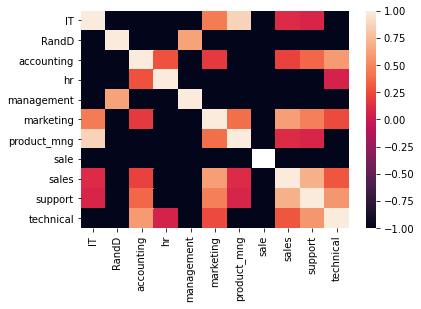

In [65]:
#检验每两个部门之间的相关关系
dp_keys = list(dp_indices.keys())
dp_mat = np.zeros([len(dp_keys),len(dp_keys)]) #生成一个方阵,需要传入一个数组
for i in range(len(dp_keys)):
    for j in range(len(dp_keys)):
        p_value = ss.ttest_ind(df['left'].iloc[dp_indices[dp_keys[j]]].values, 
                             df['left'].iloc[dp_indices[dp_keys[i]]].values )[1]
        if p_value < 0.05 :
            dp_mat[i][j] = -1
        else:
            dp_mat[i][j] = p_value
sns.heatmap(dp_mat,xticklabels=dp_keys,yticklabels=dp_keys) #以热力图呈现

In [75]:
#透视表方法（交叉分析）
df=df.dropna(how="any",axis=0)
df=df[df["last_evaluation"]<=1][df["salary"]!="nme"][df["department"]!="sale"]
piv_tb = pd.pivot_table(df,values='left',index=['promotion_last_5years','salary'],columns=['Work_accident'],aggfunc=np.mean)
piv_tb

<ipython-input-75-e91f184f048e>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df=df[df["last_evaluation"]<=1][df["salary"]!="nme"][df["department"]!="sale"]


Work_accident                        0         1
promotion_last_5years salary                    
0                     high    0.082996  0.000000
                      low     0.331728  0.090020
                      medium  0.230683  0.081655
1                     high    0.000000  0.000000
                      low     0.229167  0.166667
                      medium  0.028986  0.023256

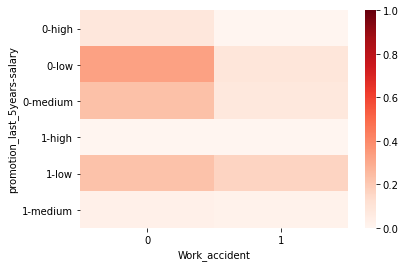

In [77]:
sns.set_context(font_scale=2)
sns.heatmap(piv_tb,vmin=0,vmax=1,cmap=sns.color_palette('Reds',n_colors=256))
plt.show()

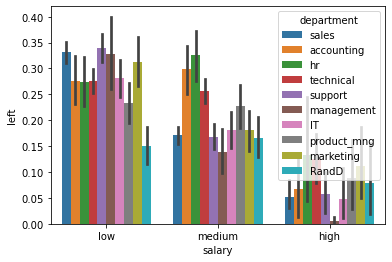

In [78]:
#分组分析
sns.barplot(x='salary',y='left',hue='department',data=df)
plt.show()

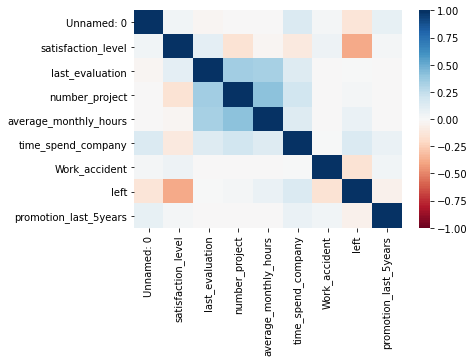

In [82]:
#相关分析
sns.heatmap(df.corr(),vmin=-1,vmax=1,cmap=sns.color_palette('RdBu',n_colors=128))
plt.show()

In [87]:
import math
s1 = pd.Series(["X1", "X1", "X2", "X2", "X2", "X2"])
s2 = pd.Series(["Y1", "Y1", "Y1", "Y2", "Y2", "Y2"])
#熵
def getEntropy(s):
    if not isinstance(s, pd.core.series.Series):
        s = pd.Series(s)
    prt_ary = np.array(s.groupby(by=s).count().values / float(len(s)))
    return -(np.log2(prt_ary) * prt_ary).sum()
#条件熵
def getCondEntropy(a1, a2):
    assert (len(a1) == len(a2))
    d = dict()
    for i in list(range(len(a1))):
        d[a1[i]] = d.get(a1[i], []) + [a2[i]]
    return sum([getEntropy(d[k]) * len(d[k]) / float(len(a1)) for k in d])
#熵增益
def getEntropyGain(a1, a2):
    return getEntropy(a2) - getCondEntropy(a1, a2)
#熵增益率
def getEntropyGainRatio(a1, a2):
    return getEntropyGain(a1, a2) / getEntropy(a2)
#相关度
def getDiscreteRelation(a1, a2):
    return getEntropyGain(a1, a2) / math.sqrt(getEntropy(a1) * getEntropy(a2))

In [88]:
print(getCondEntropy(s1, s2))
print(getCondEntropy(s2, s1))
print(getEntropyGain(s1, s2))
print(getEntropyGain(s2, s1))
print(getEntropyGainRatio(s1, s2))
print(getEntropyGainRatio(s2, s1))
print(getDiscreteRelation(s1, s2))
print(getDiscreteRelation(s2, s1))

0.5408520829727552
0.4591479170272448
0.4591479170272448
0.4591479170272448
0.4591479170272448
0.5
0.4791387674918639
0.4791387674918639


In [90]:
#因子分析
from sklearn.decomposition import PCA
my_pca = PCA(n_components=7) #因为除去离散变量后共7个变量
my_pca.fit_transform(df.drop(labels=['salary','department','left'],axis=1))
print('Ratio:',my_pca.explained_variance_ratio_)


Ratio: [9.99866787e-01 1.33024459e-04 1.13657614e-07 6.28756145e-08
 6.61812561e-09 3.23077364e-09 1.23541360e-09]


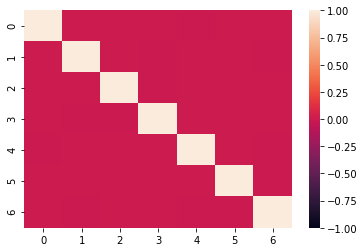

In [92]:
lower_mat = my_pca.fit_transform(df.drop(labels=['salary','department','left'],axis=1)) #PCA实际将原数据转为一个正交矩阵
sns.heatmap(pd.DataFrame(lower_mat).corr(),vmin=-1,vmax=1) 
plt.show()

In [7]:
#特征工程
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler,StandardScaler,Normalizer
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [3]:
df = pd.read_csv(r'D:\b站学习\数据分析-BV1Ui4y1o7wh\书籍+随堂源码+说明\sample_code\data\HR.csv')

<IPython.core.display.Javascript object>

In [4]:
#清洗数据
df = df.dropna(subset=['satisfaction_level','last_evaluation'])
df = df[df['satisfaction_level']<=1][df['salary']!='nme']

In [5]:
#得到标注
label = df['left']
df = df.drop(['left'],axis=1)

In [104]:
#特征选择
#由于特征较少，先不处理

In [8]:
#特征处理
#技巧-DataFrame列为列表或字符串时的One-Hot编码
# d = pd.DataFrame([['2',['Yellow','Blue']],['3',['Blue','Red']]],columns=['NUM','Color'])
# d['New_Color'] = d['Color'].apply(lambda x: ','.join(x))
# d.New_Color.str.split(',',expand=True).stack().str.get_dummies().sum(level=0)
#两种标准化处理方法 
df['satisfaction_level'] = StandardScaler().fit_transform(df['satisfaction_level'].values.reshape(-1,1))
df['last_evaluation'] = StandardScaler().fit_transform(df['last_evaluation'].values.reshape(-1,1))
df['number_project'] = StandardScaler().fit_transform(df['number_project'].values.reshape(-1,1))
df['average_monthly_hours'] = StandardScaler().fit_transform(df['average_monthly_hours'].values.reshape(-1,1))
df['Work_accident'] = StandardScaler().fit_transform(df['Work_accident'].values.reshape(-1,1))

In [9]:
department = pd.get_dummies(df['department'])
salary = pd.get_dummies(df['salary'])

In [10]:
df_new = df.join(department).join(salary)
df_new

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,Work_accident,promotion_last_5years,department,salary,IT,...,hr,management,marketing,product_mng,sales,support,technical,high,low,medium
0,-0.936495,-1.087275,-1.462863,-0.882040,3,-0.411165,0,sales,low,0,...,0,0,0,0,1,0,0,0,1,0
1,0.752814,0.840707,0.971113,1.220423,6,-0.411165,0,sales,medium,0,...,0,0,0,0,1,0,0,0,0,1
2,-2.022479,0.957554,2.593763,1.420657,4,-0.411165,0,sales,medium,0,...,0,0,0,0,1,0,0,0,0,1
3,0.431041,0.899131,0.971113,0.439508,5,-0.411165,0,sales,low,0,...,0,0,0,0,1,0,0,0,1,0
4,-0.976716,-1.145699,-1.462863,-0.841993,3,-0.411165,0,sales,low,0,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,-0.856051,-0.853580,-1.462863,-1.002181,3,-0.411165,0,support,low,0,...,0,0,0,0,0,1,0,0,1,0
14995,-0.976716,-1.379394,-1.462863,-0.821970,3,-0.411165,0,support,low,0,...,0,0,0,0,0,1,0,0,1,0
14996,-0.976716,-1.087275,-1.462863,-1.162368,3,-0.411165,0,support,low,0,...,0,0,0,0,0,1,0,0,1,0
14997,-2.022479,1.424944,1.782438,1.580845,4,-0.411165,0,support,low,0,...,0,0,0,0,0,1,0,0,1,0


In [11]:
df_new = df_new.drop(['department','salary'],axis=1)

In [12]:
df_all = df_new.join(label)

In [185]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14999 entries, 0 to 14998
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  float64
 3   average_monthly_hours  14999 non-null  float64
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  float64
 6   promotion_last_5years  14999 non-null  int64  
 7   IT                     14999 non-null  uint8  
 8   RandD                  14999 non-null  uint8  
 9   accounting             14999 non-null  uint8  
 10  hr                     14999 non-null  uint8  
 11  management             14999 non-null  uint8  
 12  marketing              14999 non-null  uint8  
 13  product_mng            14999 non-null  uint8  
 14  sales                  14999 non-null  uint8  
 15  su

In [13]:
#切分训练集、验证集和测试集，比例为0.6：0.2：0.2
from sklearn.model_selection import train_test_split

feature_v = df_new.values
label_v = label.values
X_tt,X_valid,Y_tt,Y_valid = train_test_split(feature_v,label_v,test_size=0.2) #先取验证集
X_train,X_test,Y_train,Y_test = train_test_split(X_tt,Y_tt,test_size=0.25) #再拆分训练集和测试集
print((len(X_train),len(X_valid),len(X_test)))

(8999, 3000, 3000)


In [199]:
#KNN算法
from sklearn.neighbors import NearestNeighbors,KNeighborsClassifier
from sklearn.metrics import accuracy_score,recall_score,f1_score
knn_clf = KNeighborsClassifier(n_neighbors=3)
knn_clf.fit(X_train,Y_train)
Y_pred = knn_clf.predict(X_train)
print('Train:')
print('ACC:',accuracy_score(Y_train,Y_pred))
print('RECAL:',recall_score(Y_train,Y_pred))
print('FL:',f1_score(Y_train,Y_pred))

Y_pred = knn_clf.predict(X_valid)
print('Valid:')
print('ACC:',accuracy_score(Y_valid,Y_pred))
print('RECAL:',recall_score(Y_valid,Y_pred))
print('FL:',f1_score(Y_valid,Y_pred))

Y_pred = knn_clf.predict(X_test)
print('Test:')
print('ACC:',accuracy_score(Y_test,Y_pred))
print('RECAL:',recall_score(Y_test,Y_pred))
print('FL:',f1_score(Y_test,Y_pred))

Train:
ACC: 0.9716635181686855
RECAL: 0.961155850307911
FL: 0.9408764201252029
Valid:
ACC: 0.954
RECAL: 0.9355742296918768
FL: 0.9063772048846676
Test:
ACC: 0.9566666666666667
RECAL: 0.9316353887399463
FL: 0.9144736842105262


In [214]:
#朴素贝叶斯
from sklearn.metrics import accuracy_score,recall_score,f1_score
from sklearn.naive_bayes import GaussianNB,BernoulliNB   
clf = BernoulliNB ()
clf.fit(X_train,Y_train)
Y_pred = clf.predict(X_train)
print('Train:')
print('ACC:',accuracy_score(Y_train,Y_pred))
print('RECAL:',recall_score(Y_train,Y_pred))
print('FL:',f1_score(Y_train,Y_pred))

Y_pred = clf.predict(X_valid)
print('Valid:')
print('ACC:',accuracy_score(Y_valid,Y_pred))
print('RECAL:',recall_score(Y_valid,Y_pred))
print('FL:',f1_score(Y_valid,Y_pred))

Y_pred = clf.predict(X_test)
print('Test:')
print('ACC:',accuracy_score(Y_test,Y_pred))
print('RECAL:',recall_score(Y_test,Y_pred))
print('FL:',f1_score(Y_test,Y_pred))

Train:
ACC: 0.7750861206800755
RECAL: 0.36807200378967314
FL: 0.43432084963666856
Valid:
ACC: 0.7716666666666666
RECAL: 0.35154061624649857
FL: 0.42291491154170174
Test:
ACC: 0.7683333333333333
RECAL: 0.37131367292225204
FL: 0.4435548438751001


In [210]:
#决策树，并可视化
from sklearn.metrics import accuracy_score,recall_score,f1_score
from sklearn.tree import DecisionTreeClassifier ,export_graphviz
from six import StringIO
import pydotplus 
import os
os.environ['PATH'] += os.pathsep + 'E:/Graphviz/bin/'

f_names = df_new.columns.values
clf = DecisionTreeClassifier() #默认Gini
clf.fit(X_train,Y_train)
Y_pred = clf.predict(X_train)
print('Train:')
print('ACC:',accuracy_score(Y_train,Y_pred))
print('RECAL:',recall_score(Y_train,Y_pred))
print('FL:',f1_score(Y_train,Y_pred))
dot_data = export_graphviz(clf,out_file=None,feature_names=f_names,class_names=['NL','L'],
                            filled=True,rounded=True,special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data)
graph.write_pdf('dt_tree.pdf')
Y_pred = clf.predict(X_valid)
print('Valid:')
print('ACC:',accuracy_score(Y_valid,Y_pred))
print('RECAL:',recall_score(Y_valid,Y_pred))
print('FL:',f1_score(Y_valid,Y_pred))

Y_pred = clf.predict(X_test)
print('Test:')
print('ACC:',accuracy_score(Y_test,Y_pred))
print('RECAL:',recall_score(Y_test,Y_pred))
print('FL:',f1_score(Y_test,Y_pred))

Train:
ACC: 1.0
RECAL: 1.0
FL: 1.0
Valid:
ACC: 0.9746666666666667
RECAL: 0.9649859943977591
FL: 0.9477303988995873
Test:
ACC: 0.974
RECAL: 0.9651474530831099
FL: 0.9486166007905138


In [215]:
#SVM
from sklearn.metrics import accuracy_score,recall_score,f1_score
from sklearn.svm import SVC 
clf = SVC()
clf.fit(X_train,Y_train)
Y_pred = clf.predict(X_train)
print('Train:')
print('ACC:',accuracy_score(Y_train,Y_pred))
print('RECAL:',recall_score(Y_train,Y_pred))
print('FL:',f1_score(Y_train,Y_pred))

Y_pred = clf.predict(X_valid)
print('Valid:')
print('ACC:',accuracy_score(Y_valid,Y_pred))
print('RECAL:',recall_score(Y_valid,Y_pred))
print('FL:',f1_score(Y_valid,Y_pred))

Y_pred = clf.predict(X_test)
print('Test:')
print('ACC:',accuracy_score(Y_test,Y_pred))
print('RECAL:',recall_score(Y_test,Y_pred))
print('FL:',f1_score(Y_test,Y_pred))

Train:
ACC: 0.9576619624402711
RECAL: 0.9095215537659876
FL: 0.9097370291400142
Valid:
ACC: 0.9566666666666667
RECAL: 0.9019607843137255
FL: 0.9083215796897037
Test:
ACC: 0.9603333333333334
RECAL: 0.9182305630026809
FL: 0.9200805910006714


In [220]:
#随机森林
from sklearn.metrics import accuracy_score,recall_score,f1_score
from sklearn.ensemble import RandomForestClassifier 
clf = RandomForestClassifier(max_features=None,bootstrap=True) #使用所有特征，并进行样本抽样
clf.fit(X_train,Y_train)
Y_pred = clf.predict(X_train)
print('Train:')
print('ACC:',accuracy_score(Y_train,Y_pred))
print('RECAL:',recall_score(Y_train,Y_pred))
print('FL:',f1_score(Y_train,Y_pred))

Y_pred = clf.predict(X_valid)
print('Valid:')
print('ACC:',accuracy_score(Y_valid,Y_pred))
print('RECAL:',recall_score(Y_valid,Y_pred))
print('FL:',f1_score(Y_valid,Y_pred))

Y_pred = clf.predict(X_test)
print('Test:')
print('ACC:',accuracy_score(Y_test,Y_pred))
print('RECAL:',recall_score(Y_test,Y_pred))
print('FL:',f1_score(Y_test,Y_pred))

Train:
ACC: 1.0
RECAL: 1.0
FL: 1.0
Valid:
ACC: 0.9866666666666667
RECAL: 0.9649859943977591
FL: 0.9717912552891397
Test:
ACC: 0.9876666666666667
RECAL: 0.9611260053619303
FL: 0.974847042828008


In [224]:
#Adaboost
from sklearn.metrics import accuracy_score,recall_score,f1_score
from sklearn.ensemble import AdaBoostClassifier
clf = AdaBoostClassifier(n_estimators=100,base_estimator=SVC(),algorithm='SAMME') 
clf.fit(X_train,Y_train)
Y_pred = clf.predict(X_train)
print('Train:')
print('ACC:',accuracy_score(Y_train,Y_pred))
print('RECAL:',recall_score(Y_train,Y_pred))
print('FL:',f1_score(Y_train,Y_pred))

Y_pred = clf.predict(X_valid)
print('Valid:')
print('ACC:',accuracy_score(Y_valid,Y_pred))
print('RECAL:',recall_score(Y_valid,Y_pred))
print('FL:',f1_score(Y_valid,Y_pred))

Y_pred = clf.predict(X_test)
print('Test:')
print('ACC:',accuracy_score(Y_test,Y_pred))
print('RECAL:',recall_score(Y_test,Y_pred))
print('FL:',f1_score(Y_test,Y_pred))

Train:
ACC: 0.76541837981998
RECAL: 0.0
FL: 0.0
Valid:
ACC: 0.762
RECAL: 0.0
FL: 0.0
Test:
ACC: 0.7513333333333333
RECAL: 0.0
FL: 0.0


In [228]:
#回归分析
from sklearn.metrics import accuracy_score,recall_score,f1_score,mean_squared_error
from sklearn.linear_model import LinearRegression,LogisticRegression
clf = LogisticRegression(solver='sag')
clf.fit(X_train,Y_train)
Y_pred = clf.predict(X_train)
print('Train:')
print('MSE:',mean_squared_error(Y_pred,Y_train))

Y_pred = clf.predict(X_valid)
print('Valid:')
print('MSE:',mean_squared_error(Y_pred,Y_valid))


Y_pred = clf.predict(X_test)
print('Test:')
print('MSE:',mean_squared_error(Y_pred,Y_test))


Train:
MSE: 0.2111345705078342
Valid:
MSE: 0.211
Test:
MSE: 0.21066666666666667


E:\anaconda\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


In [17]:
#神经网络
from sklearn.metrics import accuracy_score,recall_score,f1_score,mean_squared_error
from keras.models import Sequential
from keras.layers.core import Dense,Activation
from tensorflow.keras.optimizers import SGD
mdl = Sequential()
mdl.add(Dense(50,input_dim=len(X_train[0])))#指定神经元个数，输入维度与原始数据等同
mdl.add(Activation('sigmoid'))
mdl.add(Dense(2))
mdl.add(Activation('softmax'))
sgd=SGD(lr=0.01)
mdl.compile(loss='mse',optimizer=sgd)
mdl.fit(X_train,np.array([[0,1] if i==1 else [1,0] for i in Y_train]),epochs=100,batch_size=2048) #标记变量转化为为0-1数组

Y_pred = mdl.predict(X_train)
print('Train:')
Y_pred = [1 if i==[0,1] else 0 for i in Y_pred]
print('ACC:',accuracy_score(Y_train,Y_pred))
print('RECAL:',recall_score(Y_train,Y_pred))
print('FL:',f1_score(Y_train,Y_pred))

Y_pred = clf.predict(X_valid)
print('Valid:')
Y_pred = [1 if i==[0,1] else 0 for i in Y_pred]
print('ACC:',accuracy_score(Y_valid,Y_pred))
print('RECAL:',recall_score(Y_valid,Y_pred))
print('FL:',f1_score(Y_valid,Y_pred))

Y_pred = clf.predict(X_test)
print('Test:')
Y_pred = [1 if i==[0,1] else 0 for i in Y_pred]
print('ACC:',accuracy_score(Y_test,Y_pred))
print('RECAL:',recall_score(Y_test,Y_pred))
print('FL:',f1_score(Y_test,Y_pred))

E:\anaconda\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


Epoch 1/100
5/5 [==============================] - 0s 2ms/step - loss: 0.4046
Epoch 2/100
5/5 [==============================] - 0s 2ms/step - loss: 0.3476
Epoch 3/100
5/5 [==============================] - 0s 2ms/step - loss: 0.2988
Epoch 4/100
5/5 [==============================] - 0s 2ms/step - loss: 0.2624
Epoch 5/100
5/5 [==============================] - 0s 3ms/step - loss: 0.2371
Epoch 6/100
5/5 [==============================] - 0s 3ms/step - loss: 0.2202
Epoch 7/100
5/5 [==============================] - 0s 3ms/step - loss: 0.2091
Epoch 8/100
5/5 [==============================] - 0s 3ms/step - loss: 0.2017
Epoch 9/100
5/5 [==============================] - 0s 2ms/step - loss: 0.1966
Epoch 10/100
5/5 [==============================] - 0s 2ms/step - loss: 0.1930
Epoch 11/100
5/5 [==============================] - 0s 2ms/step - loss: 0.1904
Epoch 12/100
5/5 [==============================] - 0s 2ms/step - loss: 0.1886
Epoch 13/100
5/5 [==============================] - 0s 2ms/st

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

array([[0, 1],
       [0, 1],
       [0, 1],
       ...,
       [0, 1],
       [0, 1],
       [0, 1]])

AttributeError: 'tuple' object has no attribute 'res'

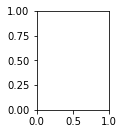

In [26]:
#聚类算法
import numpy
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles,make_blobs,make_moons
from sklearn.cluster import KMeans
n_samples = 1000
circles = make_circles(n_samples=n_samples,factor=0.5,noise=0.05)
moons = make_moons(n_samples=n_samples,noise=0.05)
blobs = make_blobs(n_samples=n_samples,random_state=8)
random_data = np.random.rand(n_samples,2),None
colors = 'bgrcmyk'
data = [circles,moons,blobs,random_data]

models = [('None',None),('Kmeas',KMeans(n_clusters=2))]


f = plt.figure()
for inx,clt in enumerate(models):
    clt_name,clt_entity = clt
    for i,datasets in enumerate(data):
        X,Y = datasets
        if not clt_entity:
            clt_res =[0 for item in range(len(X))]
        else:
            clt_entity.fit(X)
            clt_res = clt_entity.labels_.astype(np.int)
        f.add_subplot(len(models),len(data),inx*len(data)+i+1)
        
        [plt.scatter(X[p,0],X[p,1],colors=colors[clt.res[p]]) for p in range(len(X))] 
plt.show()



In [30]:
string= 'fwfewe'
string[::-1]

'ewefwf'

In [36]:
#标签传播算法
import numpy as np
from sklearn import datasets


In [51]:
iris = datasets.load_iris()
labels = np.copy(iris.target)
random_unlabeled_points = np.random.rand(len(labels))
#将随机数小于0.5的部分都设为未标记数据
random_unlabeled_points=random_unlabeled_points <0.5
Y = labels[random_unlabeled_points]
labels[random_unlabeled_points] = -1
print('Unlabeled Number:',list(labels).count(-1))

Unlabeled Number: 82


In [54]:
from sklearn.semi_supervised import LabelPropagation
from sklearn.metrics import accuracy_score,recall_score,f1_score
label_model = LabelPropagation()
label_model.fit(iris.data,labels)
Y_pred = label_model.predict(iris.data[random_unlabeled_points])
print('ACC:',accuracy_score(Y,Y_pred))
print('RECALL:',recall_score(Y,Y_pred,average='micro'))
print('F1:',f1_score(Y,Y_pred,average='micro'))

ACC: 0.975609756097561
RECALL: 0.975609756097561
F1: 0.975609756097561
